# TASK1

In [35]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp as tdsp
import thinkplot
import numpy as np
import math

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Рассмотрим пример утечки:

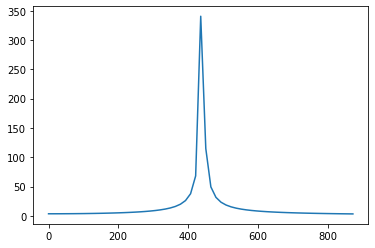

In [36]:
signal = tdsp.SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

spectrum.plot(high=880)

Представим ввиде других 4 окон:

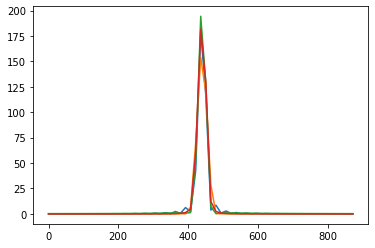

In [37]:
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)


Все четыре хорошо справляются с уменьшением утечки. Фильтр Бартлетта оставляет некоторый остаточный «звон». Фильтр Хэмминга рассеивает наименьшее количество энергии.

# TASK2

Реализуем класс SawtoothChirp, который расширяет Chirp и переопределяет оценку для генерации пилообразного сигнала с частотой, которая  линейно изменилась:

In [38]:
PI2 = 2 * math.pi

class SawtoothChirp(thinkdsp.Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = self.amp * frac
        return ys

Сгенерируем звук:

In [39]:
signal = SawtoothChirp(start=500, end=1300)
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

Рассмотрим спектрограмму:

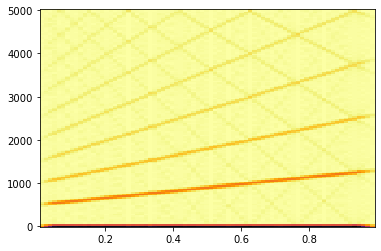

In [40]:
sp = wave.make_spectrogram(256)
sp.plot()

При относительно низкой частоте кадров вы можете увидеть, как гармоники с наложенными частотами отражаются от частоты сворачивания. 

# TASK3

Поскольку основная частота колеблется от 2500 до 3000 Гц, мы ожидаем увижеть всплеск. Первая гармоника колеблется от 5000 до 6000 Гц, поэтому в даннос случае всплеск будет меньше чем в первом случае. Следующая гармоника колеблется от 7500 до 9000 значит всплеск будет еще меньше чем во 2 случае.

Другие гармоники повсюду накладываются друг на друга, и образуют энергию. Эта распределенная энергия создает интересные звуки.

In [41]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

Рассмотрим получившийя спектр:

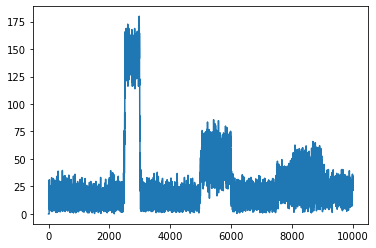

In [42]:
newWave = wave.make_spectrum()
newWave.high_pass(20)
newWave.plot()

Для получения такого графика мне пришлось обрезать первоначальный вариант, так как частота в начале была значильно больше чем на протяжении всего графика.

# TASK4

Используя ссылку из методички я скачал глиссандо и обрезал до 11 первых секунд

In [55]:
wave = thinkdsp.read_wave('gl.wav')
wave.make_audio()

Рассмотрим спектрограмму:

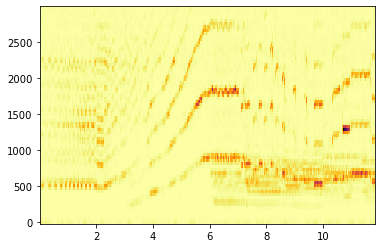

In [59]:
wave.make_spectrogram(1024).plot(high=3000)

# TASK5

Класс который мы реализуем будет представлять из себя сигнал схожий с тромбоподобными, имеющий переменную частоту.

In [60]:
class TromboneGliss(thinkdsp.Chirp):
    def _evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

Рассмотрим первую часть сигнала:

In [65]:
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

Рассмотрим вторую часть сигнала:

In [66]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Для получения конечного результата соединим первую и вторую части сигнала 

In [67]:
wave = wave2 | wave1
wave.make_audio()

Рассмотрим спектрограмму:

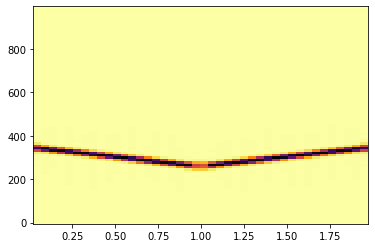

In [68]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)

# TASK6

Использую звук из методички, на котором мужчина произносит некоторые гласные звуки с эффектом "эхо" 

In [71]:
wave = thinkdsp.read_wave('task6.wav')
wave.make_audio()

Рассмотрим спектрограмму:

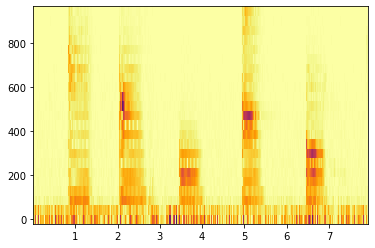

In [72]:
wave.make_spectrogram(1024).plot(high=1000)

Полоса внизу, вероятно, является фоновым шумом. Пики на спектрограмме называются формантами.

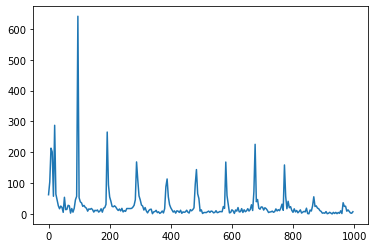

In [73]:
high = 1000

segment = wave.segment(start=1, duration=0.25)
segment.make_spectrum().plot(high=high)

Мы можем увидеть форматы более четко, выбрав сегмент во время "а".

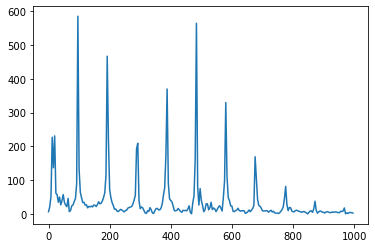

In [74]:
segment = wave.segment(start=2.2, duration=0.25)
segment.make_spectrum().plot(high=high)

Сегмент «э» имеет высокоамплитудную форманту около 500 Гц.

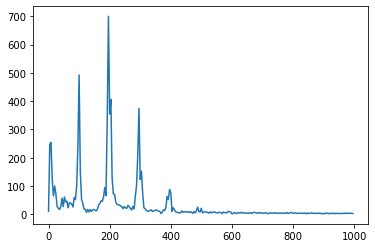

In [75]:
segment = wave.segment(start=3.5, duration=0.25)
segment.make_spectrum().plot(high=high)

В сегменте "и" нет высокочастотных составляющих.

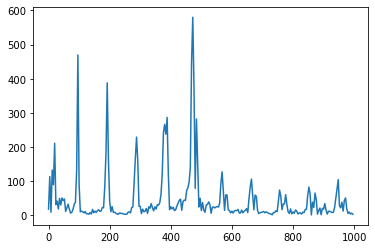

In [76]:
segment = wave.segment(start=5.1, duration=0.25)
segment.make_spectrum().plot(high=high)

Сегмент «о» имеет высокоамплитудную форманту около 500 Гц, даже выше основной гармоники.

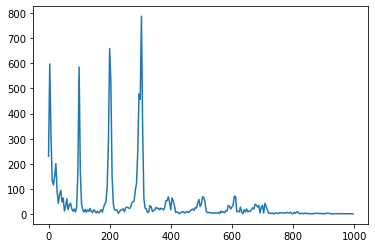

In [77]:
segment = wave.segment(start=6.5, duration=0.25)
segment.make_spectrum().plot(high=high)

Сегмент "у" имеет высокоамплитудную форманту около 300 Гц и не имеет высокочастотных составляющих.